In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia

Workaround solutions for the Gaia Archive issues following the infrastructure upgrade: https://www.cosmos.esa.int/web/gaia/news#WorkaroundArchive


In [2]:
query = """
SELECT TOP 5000
    ra, dec,
    pmra, pmdec,
    parallax
FROM gaiadr3.gaia_source
WHERE parallax > 10
  AND pmra IS NOT NULL
  AND pmdec IS NOT NULL
"""

job = Gaia.launch_job(query)
results = job.get_results()

In [4]:
# Distance in parsecs (parallax in milliarcseconds)
distance_pc = 1000 / results['parallax']

# Proper motion magnitude (mas/yr)
pm_total = np.sqrt(results['pmra']**2 + results['pmdec']**2)

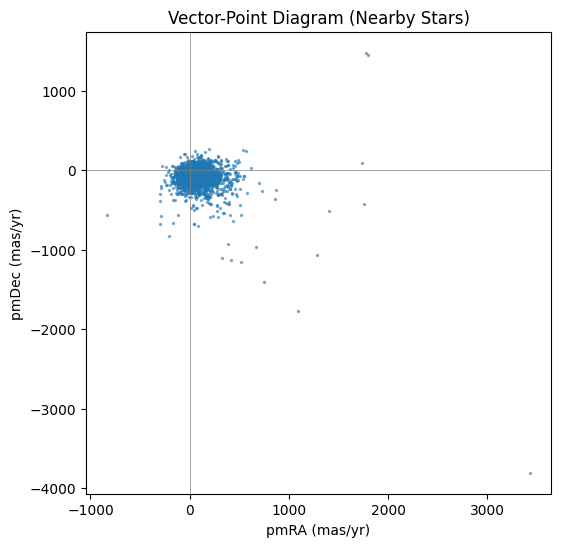

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(results['pmra'], results['pmdec'], s=2, alpha=0.5)
plt.xlabel("pmRA (mas/yr)")
plt.ylabel("pmDec (mas/yr)")
plt.title("Vector-Point Diagram (Nearby Stars)")
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()

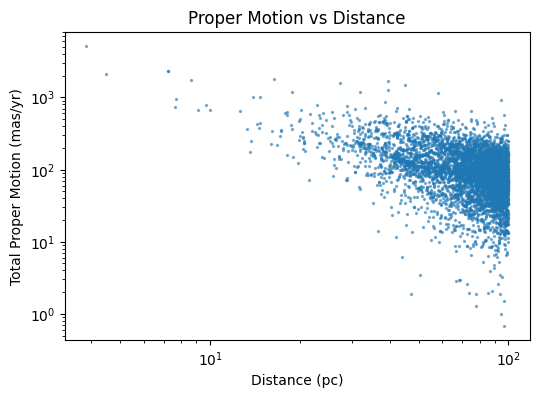

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(distance_pc, pm_total, s=2, alpha=0.5)
plt.xlabel("Distance (pc)")
plt.ylabel("Total Proper Motion (mas/yr)")
plt.title("Proper Motion vs Distance")
plt.yscale("log")
plt.xscale("log")
plt.show()

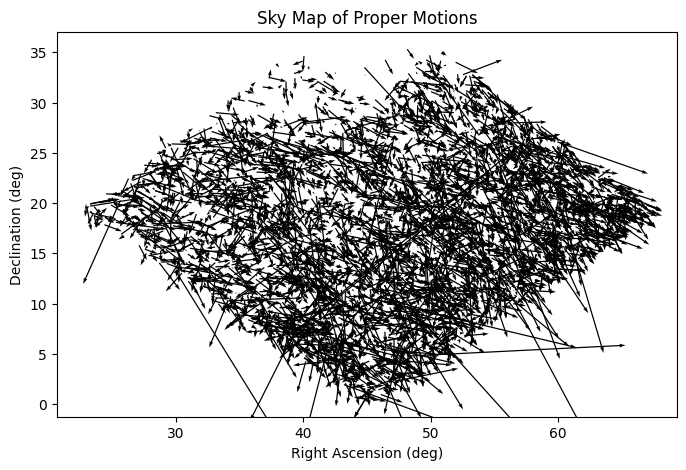

In [8]:
# Convert Astropy columns to NumPy arrays explicitly
ra = np.array(results['ra'])
dec = np.array(results['dec'])
pmra = np.array(results['pmra'])
pmdec = np.array(results['pmdec'])

plt.figure(figsize=(8, 5))
plt.quiver(
    ra,
    dec,
    pmra,
    pmdec,
    scale=5000,
    width=0.002
)
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Sky Map of Proper Motions")
plt.show()